In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean

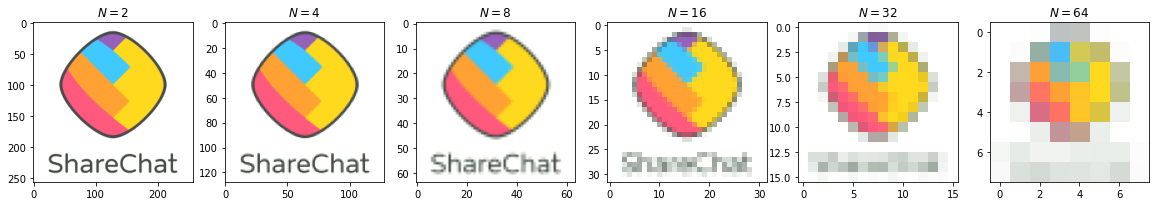

In [2]:
img = imread('images/logo.png')
factors = 2**np.arange(1, 7)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(img, 
                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(factor))

In [9]:
figure.savefig("images/logo-samples.png")

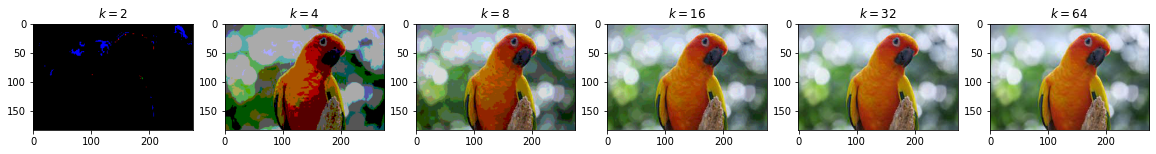

In [3]:
img = imread('images/parrot.jpeg')
factors = 2**np.arange(1, 7)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, img.max(), k)
    image = np.digitize(img, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

In [4]:
figure.savefig("images/parrot-quantize.png")

In [5]:
import cv2

In [6]:
# img = cv2.imread('images/lena.jpeg',0)
img = cv2.imread('images/brick.jpeg', 0)
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

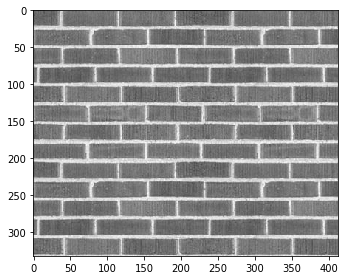

In [9]:
imshow(img)

In [7]:
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])


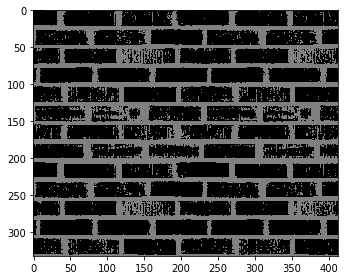

In [8]:
recombined_image = eight_bit_img 
imshow(recombined_image)

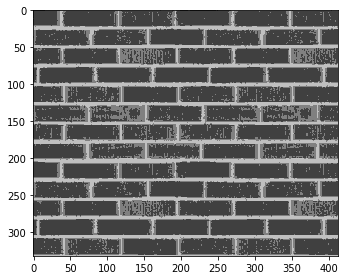

In [10]:
recombined_image += seven_bit_img 
imshow(recombined_image)

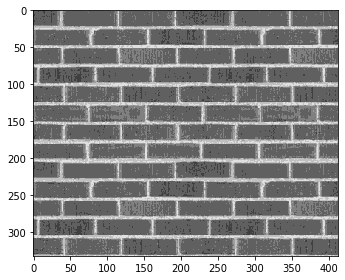

In [17]:
recombined_image += six_bit_img 
imshow(recombined_image)

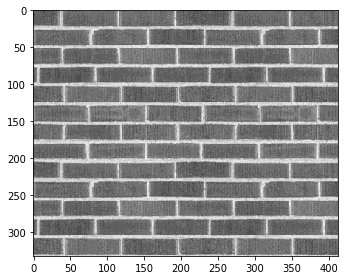

In [18]:
recombined_image += five_bit_img 
imshow(recombined_image)

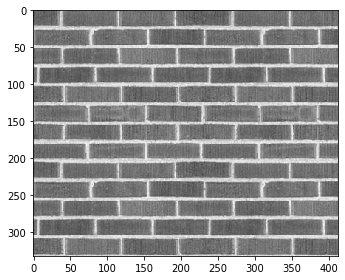

In [19]:
recombined_image += four_bit_img 
imshow(recombined_image)

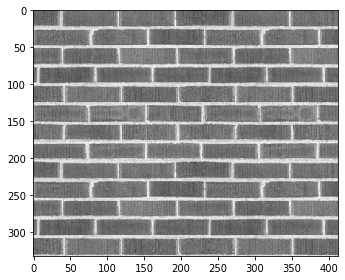

In [20]:
recombined_image += three_bit_img 
imshow(recombined_image)

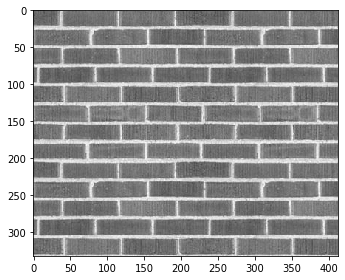

In [21]:
recombined_image += two_bit_img 
imshow(recombined_image)

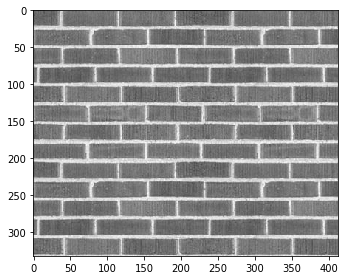

In [22]:
recombined_image += one_bit_img 
imshow(recombined_image)

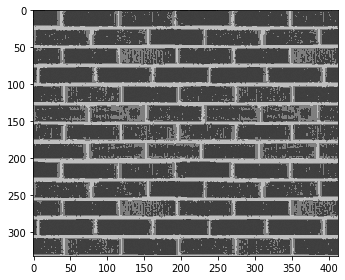

In [13]:
imshow(recombined_image - two_bit_img)

In [30]:
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
cv2.imwrite("images/wall-merge.png", final*255)

True

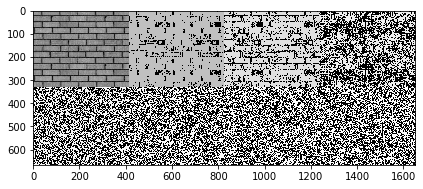

In [31]:
imshow(final*255)
